# Project: Retail Transaction Data

Step 1: Load the dataset

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     #import all libraries
import seaborn as sns

In [80]:
# Load the first CSV file
response_df = pd.read_csv('Retail_Data_Response.csv')

# Load the second CSV file
transactions_df = pd.read_csv('Retail_Data_Transactions.csv')

# Display the first few rows of each DataFrame
print("Retail_Data_Response:")
display(response_df.head())

print("Retail_Data_Transactions:")
display(transactions_df.head())

Retail_Data_Response:


customer_id  response
0      CS1112         0
1      CS1113         0
2      CS1114         1
3      CS1115         1
4      CS1116         1

Retail_Data_Transactions:


customer_id trans_date  tran_amount
0      CS5295  11-Feb-13           35
1      CS4768  15-Mar-15           39
2      CS2122  26-Feb-13           52
3      CS1217  16-Nov-11           99
4      CS1850  20-Nov-13           78

# Step 2:Data Cleaning and Preprocessing

(Before analysing check missing values and remove unnecessary data)

In [83]:
# Check for missing values in both DataFrames
print(transactions_df.isnull().sum())   #Check missing values
transactions_df = transactions_df.dropna()     #drop rows with missing values
print("Dataset Shape:",transactions_df.shape)    #print dataset shape i.e (rows,cols) and also it meets our requirement of 150 rows and 3 cols.

customer_id    0
trans_date     0
tran_amount    0
dtype: int64
Dataset Shape: (125000, 3)


# Step 3:Asking Questions And Finding Answers

In [86]:
# 1) What is the total revenue from all transactions?
total_revenue = transactions_df["tran_amount"].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 8123989


In [88]:
# 2)What is the average transaction amount per customer?
avg_transaction = transactions_df.groupby("customer_id")["tran_amount"].mean()
avg_transaction.head()

customer_id
CS1112    67.466667
CS1113    74.500000
CS1114    75.368421
CS1115    75.409091
CS1116    65.923077
Name: tran_amount, dtype: float64

In [90]:
# 3)Which customer has made the highest total transactions?
top_customer = transactions_df.groupby("customer_id")["tran_amount"].sum().idxmax()   #returns index of highest value in col or series.
top_customer

'CS4424'

In [92]:
# 4)What is the highest transaction amount?
max_transaction = transactions_df["tran_amount"].max()
print("Highest Transaction Amount:",max_transaction)

Highest Transaction Amount: 105


# Step 4:Data Visualization

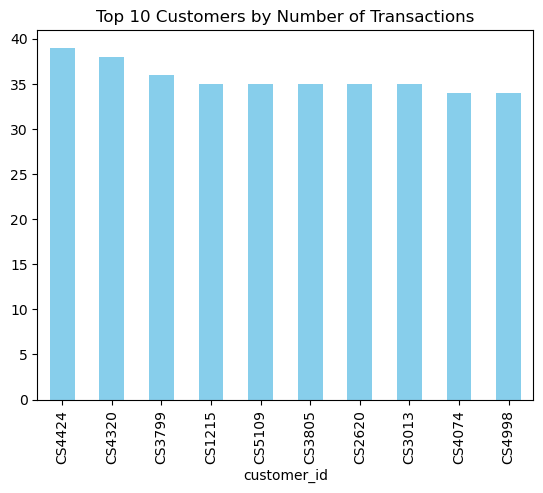

In [95]:
# 1.Bar Chart-No of transactions per customer
transactions_df["customer_id"].value_counts().head(10).plot(kind="bar",color="skyblue")
plt.title("Top 10 Customers by Number of Transactions")
plt.show()

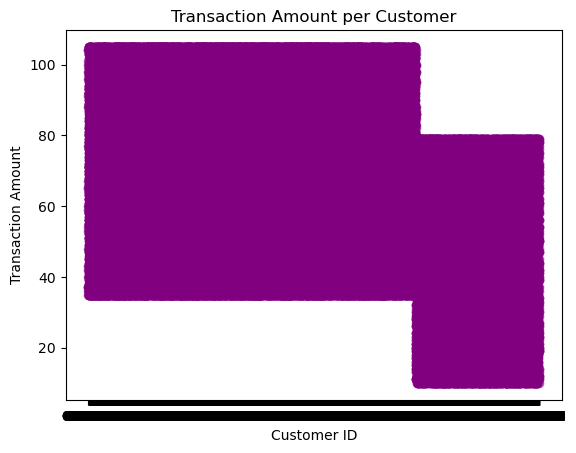

In [97]:
# 2.Scatter plot- Transaction Amount per Customer
plt.scatter(transactions_df["customer_id"],transactions_df["tran_amount"],color="purple",alpha=0.5)
plt.title("Transaction Amount per Customer")
plt.xlabel("Customer ID")
plt.ylabel("Transaction Amount")
plt.show()

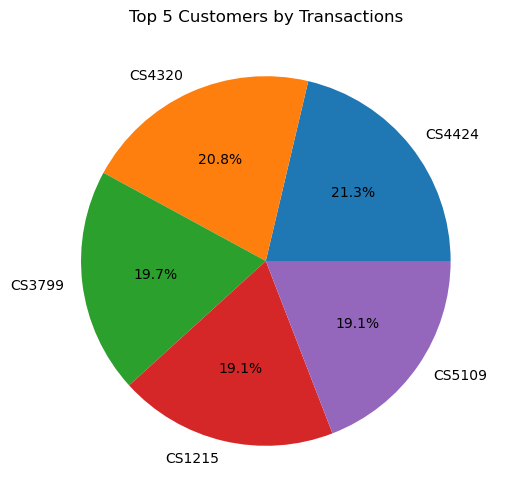

In [98]:
# 3)Pie Chart-Top 5 customers by transactions
transactions_df["customer_id"].value_counts().head(5).plot(kind="pie",autopct="%1.1f%%",figsize=(6,6))
plt.title("Top 5 Customers by Transactions")
plt.ylabel("")   # it will hides the label
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12012\511528697.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transactions_df["trans_date"]=pd.to_datetime(transactions_df["trans_date"])


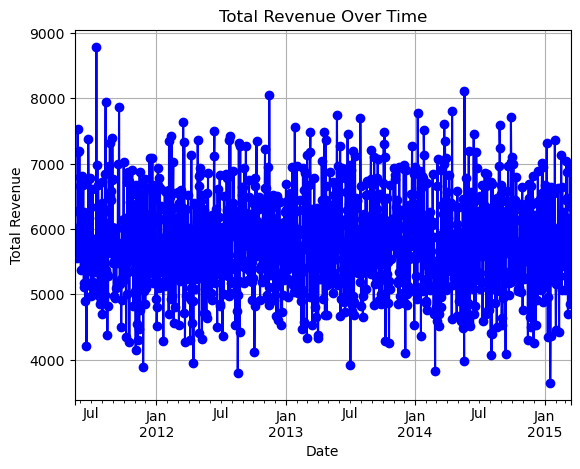

In [99]:
# 4)Line Chart-Total revenue overtime
#convert 'trans_date' to datetime format
transactions_df["trans_date"]=pd.to_datetime(transactions_df["trans_date"])

#Group by date and sum the transaction amounts
daily_revenue = transactions_df.groupby("trans_date")["tran_amount"].sum()

#plot the line chart
daily_revenue.plot(kind="line",color="blue",marker="o")

#Add title and labels
plt.title("Total Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

# Conclusion- In this project, we analysed retail transaction data to understand sales trends and customer buying behaviour.